## 📌 Project 1: Explore World Happiness Index

### 📝 Description:

Students will analyze the World Happiness Report data to understand what contributes to happiness, such as GDP per capita, social support, and life expectancy.

### 📁 Dataset:

Download from [Kaggle: World Happiness Report](https://www.kaggle.com/datasets/unsdsn/world-happiness)

Or use this simplified CSV version (`happiness.csv`):

| Country | Happiness Score | GDP per Capita | Social Support | Healthy Life Expectancy |
| ------- | --------------- | -------------- | -------------- | ----------------------- |
| Norway  | 7.54            | 1.63           | 1.53           | 0.96                    |
| ...     | ...             | ...            | ...            | ...                     |

### 💡 Concepts:

* Summary stats: mean, median, std, skew, kurtosis
* Outlier detection (boxplot)
* Correlation heatmap
* Insight: What factors strongly correlate with happiness?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [3]:
# 1. Load dataset
df = pd.read_csv("happiness_2019.csv")
print(df.head())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

In [4]:
# 2. Summary stats
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000

In [5]:
# 3. Skewness and Kurtosis
print("\nSkewness:")
print(df.skew(numeric_only=True))
print("\nKurtosis:")
print(df.kurtosis(numeric_only=True))


Skewness:
Overall rank                    0.000000
Score                           0.011450
GDP per capita                 -0.385232
Social support                 -1.134728
Healthy life expectancy        -0.613841
Freedom to make life choices   -0.685636
Generosity                      0.745942
Perceptions of corruption       1.650410
dtype: float64

Kurtosis:
Overall rank                   -1.200000
Score                          -0.608375
GDP per capita                 -0.769902
Social support                  1.229005
Healthy life expectancy        -0.302895
Freedom to make life choices   -0.068857
Generosity                      1.173189
Perceptions of corruption       2.416824
dtype: float64


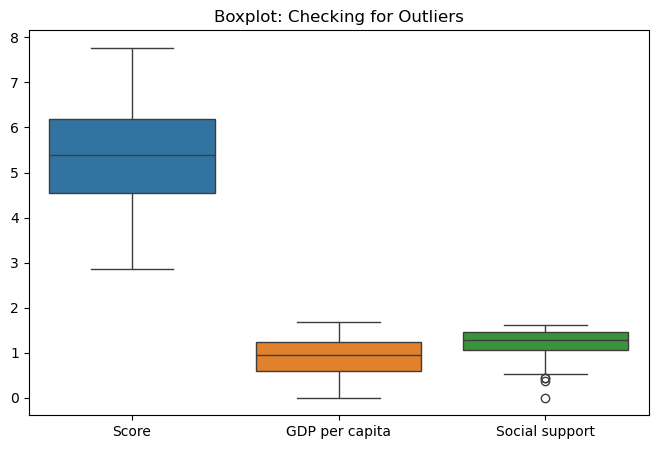

In [7]:
# 4. Boxplot to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["Score", "GDP per capita", "Social support"]])
plt.title("Boxplot: Checking for Outliers")
plt.show()

#### 🔍 What You See:

* A **separate box** for each variable.
* Each box shows:

  * **Median** (middle line)
  * **Interquartile range (IQR)** (box itself)
  * **Whiskers** (typical range of data)
  * **Dots outside whiskers** = **outliers**

#### 🧠 What It Tells You:

* You can visually compare **distribution and spread**.
* If GDP or Social Support has **dots above the whiskers**, those are **outliers** (e.g., a country with extremely high GDP like Luxembourg or Norway).
* Useful for identifying **extreme values** that might skew analysis.

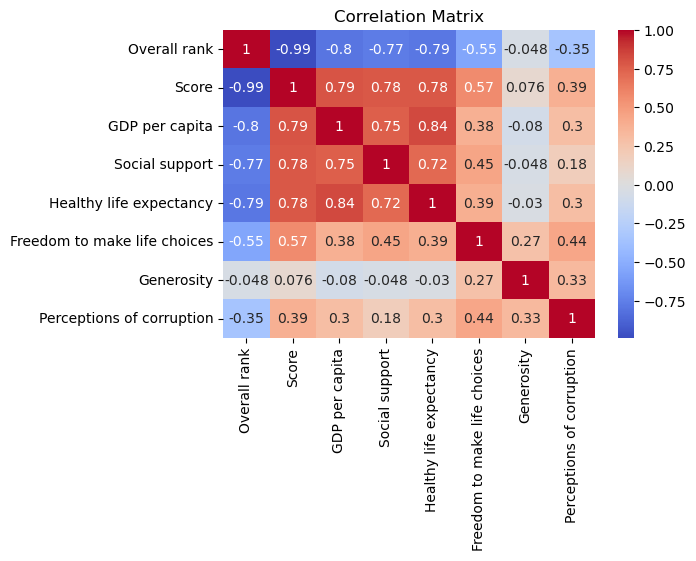

In [8]:
# 5. Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#### 🔍 What You See:

* A **color-coded matrix** of correlation values between variables.
* Values range from **-1 to 1**:

  * **+1**: strong positive correlation
  * **-1**: strong negative correlation
  * **0**: no correlation

#### 🧠 What It Tells You:

* Shows which variables are **related** to happiness:

  * If **GDP per Capita** has a high positive correlation (e.g., `0.75`) with **Happiness Score**, it suggests wealthier countries tend to be happier.
  * If **Social Support** also has a high correlation, that indicates relationships matter too.

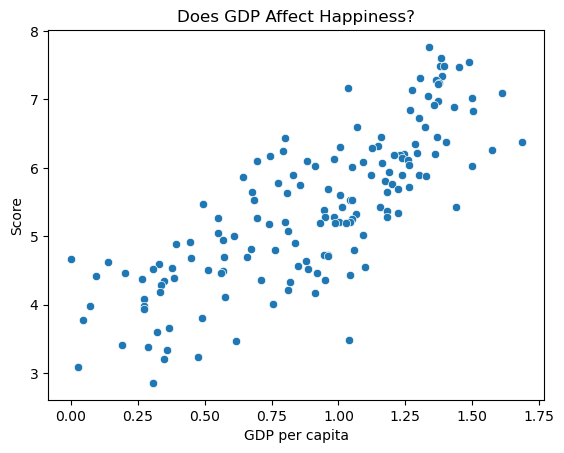

In [10]:
# 6. Scatterplot to explore insights
sns.scatterplot(data=df, x="GDP per capita", y="Score")
plt.title("Does GDP Affect Happiness?")
plt.show()

#### 🔍 What You See:

* Each **point** represents a country.
* **X-axis**: GDP per Capita
* **Y-axis**: Happiness Score

#### 🧠 What It Tells You:

* If the plot shows an **upward trend**, it suggests **positive correlation**: as GDP increases, happiness tends to increase.
* **Tight clustering** = strong relationship.
* **Scattered points** or flat trend = weak or no correlation.

### 🧠 Summary Table

| Plot Type          | What It Shows                           | Insights You Can Draw                            |
| ------------------ | --------------------------------------- | ------------------------------------------------ |
| Boxplot            | Spread, median, and outliers            | Identify extreme values that could skew analysis |
| Correlation Matrix | Strength of relationships               | Spot variables most related to happiness         |
| Scatterplot        | Detailed relationship between 2 columns | Explore if higher GDP leads to higher happiness  |